## Imports:

In [1]:
import numpy as np

# import plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# font preferences
mpl.rcParams.update({
    'font.size': 9,
    'text.usetex': True,
    'font.family': 'Computer Modern Serif'
})

# high quality figures
plt.rcParams['savefig.dpi'] = 1200
plt.rcParams['figure.dpi'] = 1200

from scipy.signal import savgol_filter

## Read in data:

In [5]:
# Milky Way:
MW_disk_n = np.genfromtxt('/Users/gabeweible/OneDrive/junior/astr_400b/400B_2023_Weible/ResearchAssignments/ResearchAssignment6/sersic_indices/MW_Disk_sersic_indices.txt', delimiter=',')
MW_bulge_n = np.genfromtxt('/Users/gabeweible/OneDrive/junior/astr_400b/400B_2023_Weible/ResearchAssignments/ResearchAssignment6/sersic_indices/MW_Bulge_sersic_indices.txt', delimiter=',')

# Andromeda:
M31_disk_n = np.genfromtxt('/Users/gabeweible/OneDrive/junior/astr_400b/400B_2023_Weible/ResearchAssignments/ResearchAssignment6/sersic_indices/M31_Disk_sersic_indices.txt', delimiter=',')
M31_bulge_n = np.genfromtxt('/Users/gabeweible/OneDrive/junior/astr_400b/400B_2023_Weible/ResearchAssignments/ResearchAssignment6/sersic_indices/M31_Bulge_sersic_indices.txt', delimiter=',')

# Remove NaN at the end from extra comma:
MW_disk_n = MW_disk_n[:-1]
MW_bulge_n = MW_bulge_n[:-1]

M31_disk_n = M31_disk_n[:-1]
M31_bulge_n = M31_bulge_n[:-1]

## Smooth:

In [27]:
sz = 35 # number of points per fit
deg = 4 # 2 = quadratic fit, 3 = cubic, etc.

MW_disk_s = savgol_filter(MW_disk_n, sz, deg)
MW_bulge_s = savgol_filter(MW_bulge_n, sz, deg)

M31_disk_s = savgol_filter(M31_disk_n, sz, deg)
M31_bulge_s = savgol_filter(M31_bulge_n, sz, deg)

## Plot:

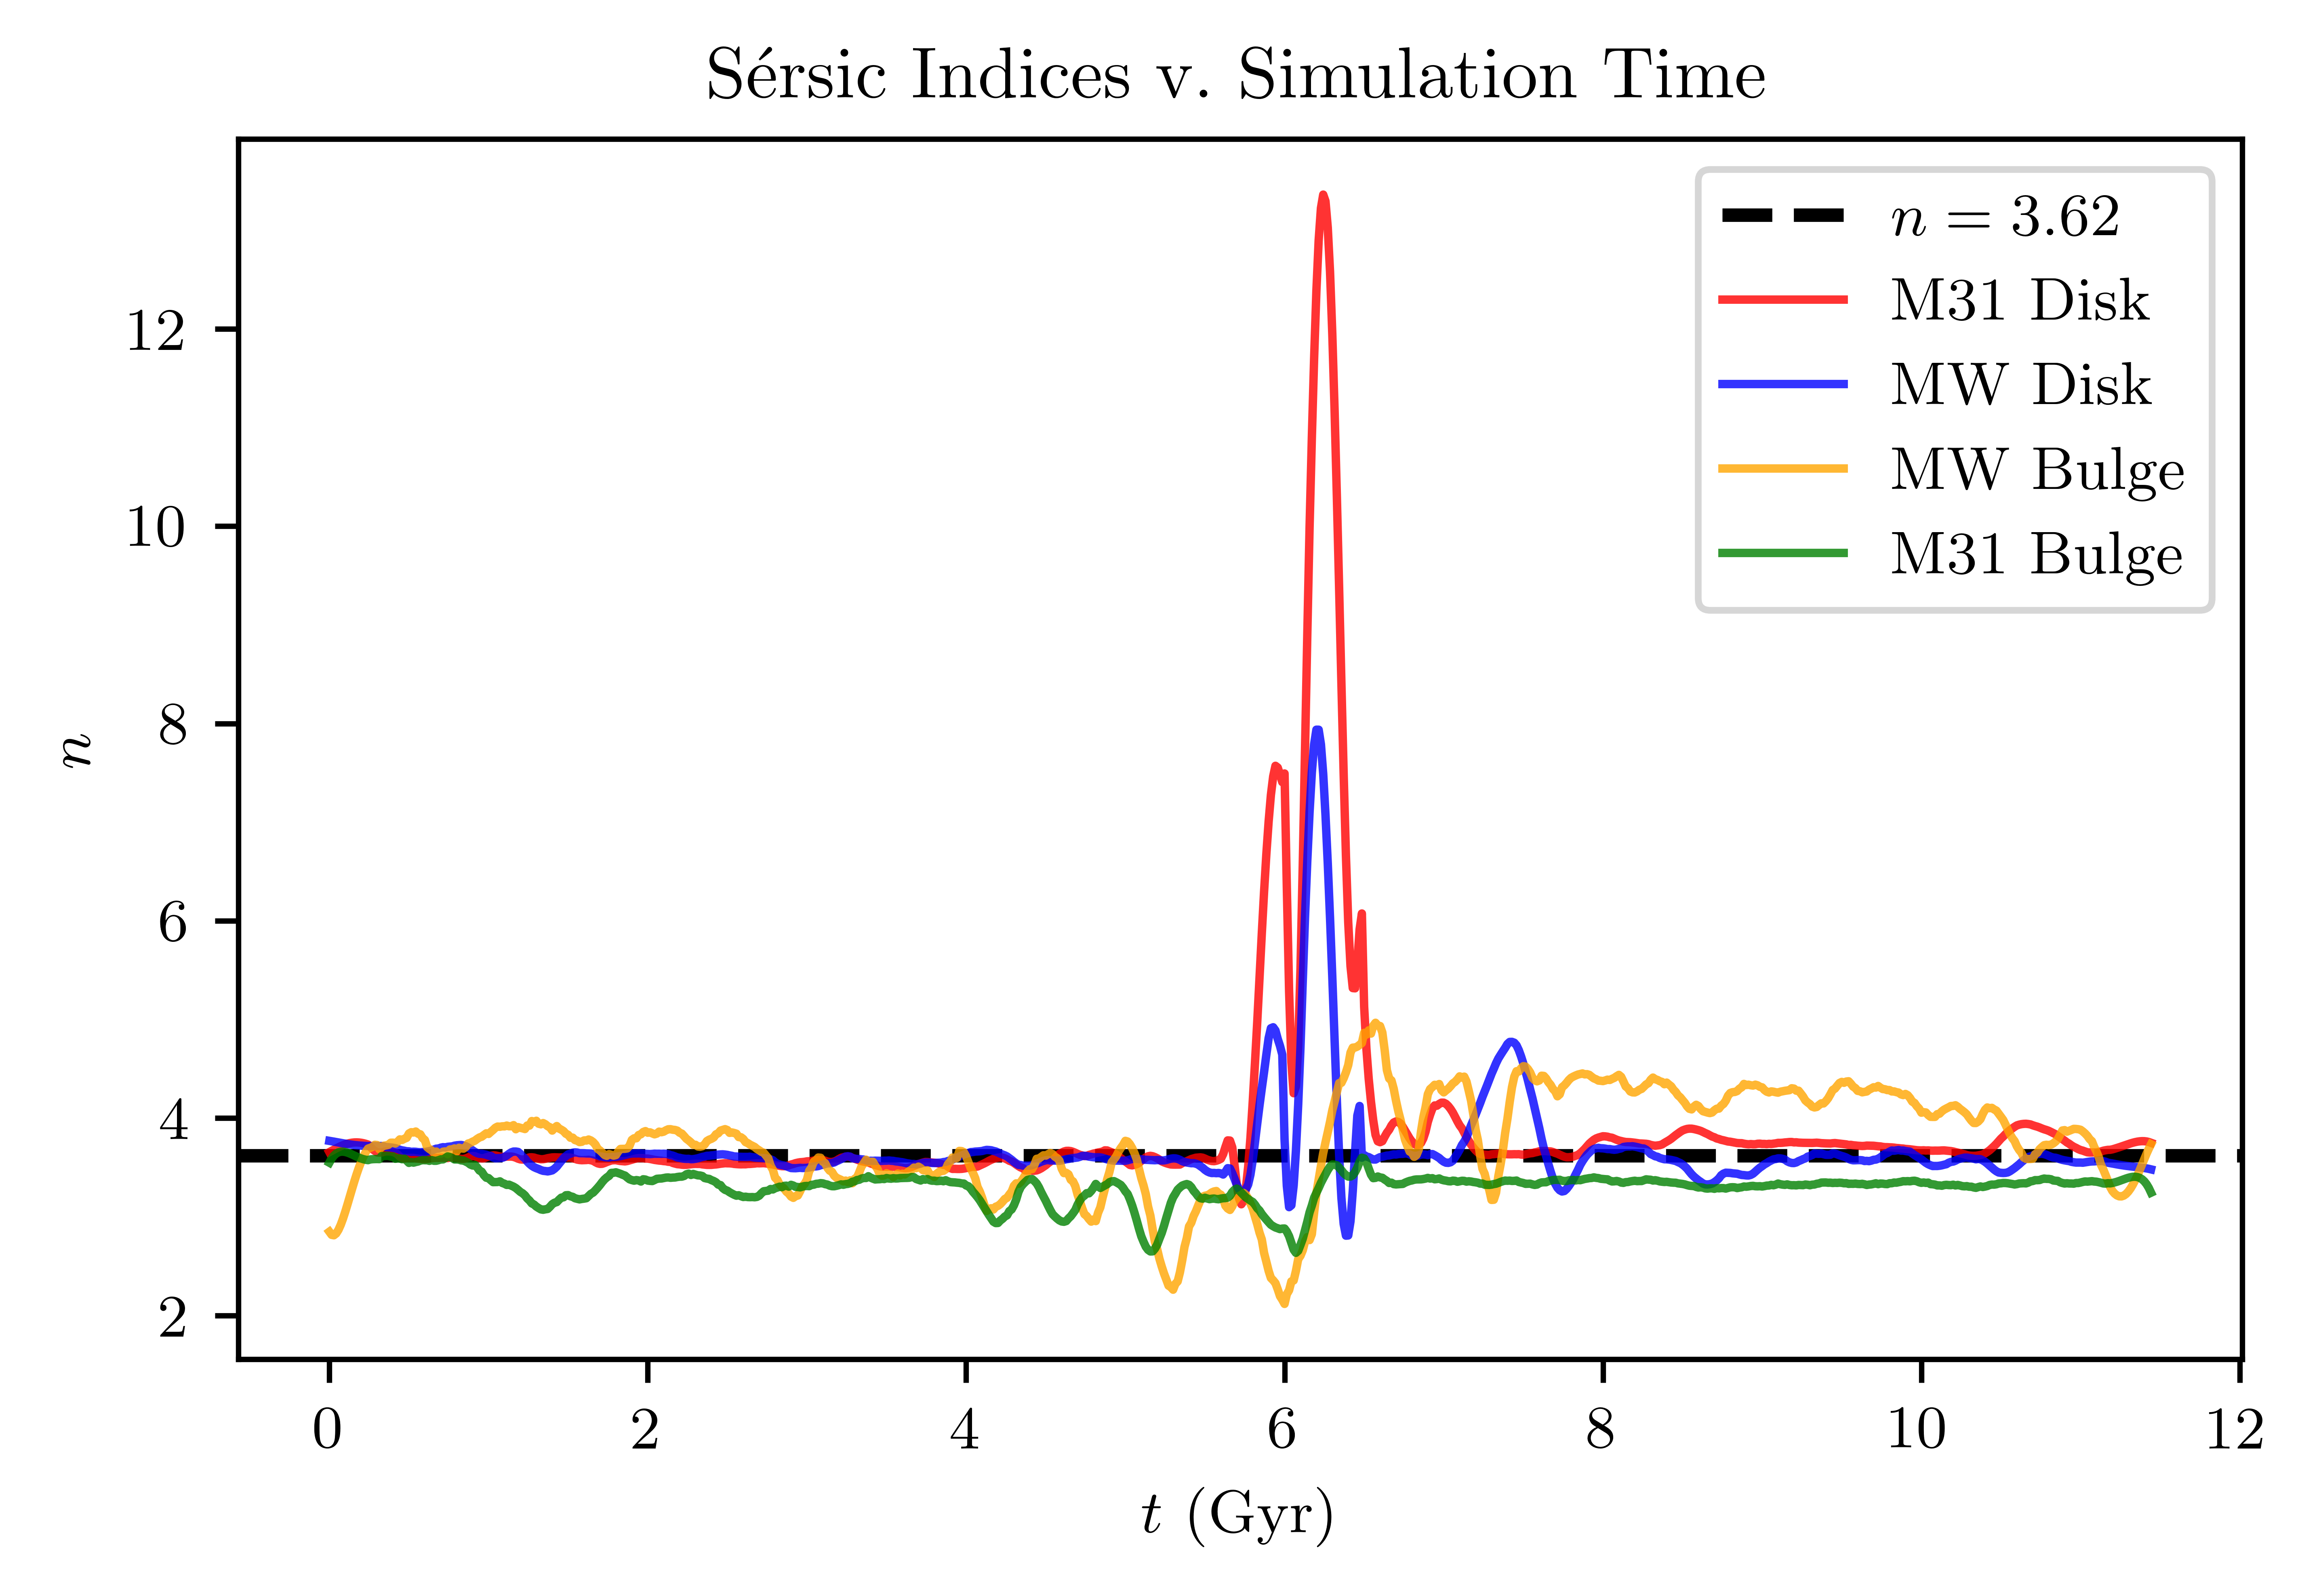

In [30]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1.25

# opacity
a = 0.8

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

# Baseline
ax.axhline(3.62, label=r'$n = 3.62$', linestyle='--', color='k', lw=2)

ax.plot(t, M31_disk_s, label='M31 Disk', color='r', lw=lw, alpha=a)
ax.plot(t, MW_disk_s, label='MW Disk', color='b', lw=lw, alpha=a)
ax.plot(t, MW_bulge_s, label='MW Bulge', color='orange', lw=lw, alpha=a)
ax.plot(t, M31_bulge_s, label='M31 Bulge', color='g', lw=lw, alpha=a)

ax.legend()
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$n$', title=r"S\'ersic Indices v.~Simulation Time")
plt.savefig('indices_v_time.png', facecolor='w')

plt.show()

In [16]:
a = (np.mean(MW_disk_n[:802//3]) + np.mean(MW_disk_n[2*802//3:])) / 2
b = (np.mean(MW_bulge_n[:802//3]) + np.mean(MW_bulge_n[2*802//3:])) / 2
     
c = (np.mean(M31_disk_n[:802//3]) + np.mean(M31_disk_n[2*802//3:])) / 2
d = (np.mean(M31_bulge_n[:802//3]) + np.mean(M31_bulge_n[2*802//3:])) / 2
     
baseline = (a + b + c + d) / 4
print(baseline)

3.6196607042046143
